# IE8090: Numerical illustration for the problem 4 HA 5 -- on the weakness of the Chebyshev bound
We have found a Chebyshev bound on the min number of $n$ in an experiment of tossing a coin to determine the true value of the "head" probability $p$.

**Note:** it seems to be a weak one. Let us find a tighter one numberically

In [22]:
# imports
import math as math
import pandas as pd
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Define necessary functions

Let us assume that we estimate our probability as $\hat{p} = \frac{\sum X_i}{n}$. Then, the probability to stay within the interval $(p-\epsilon, p+\epsilon)$ is:

$$
\mathbb{P}[\hat{p} \in (p-\epsilon,p+\epsilon)] = \mathbb{P}[n\hat{p} \in (n(p-\epsilon), n(p+\epsilon)]
$$

Where $n \hat{p}$ is just a binomial random variable (with the a success probability $p$ and $n$ trials). Theoretically, we can explicitly write down that probability:
$$
\mathbb{P}[n\hat{p} \in (n(p-\epsilon), n(p+\epsilon)] = \sum_{k=\lceil n(p-\epsilon) \rceil}^{\lfloor n(p+\epsilon) \rfloor} {n \choose k} p^k (1-p)^{n-k}
$$

So let us just define this function to be computed numerically from the given $\epsilon$ (which is 0.1 in our case), $n$ and $p$.

In [5]:
def C(n,k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k));

In [95]:
def probWithinMargin(n,p,eps):
    S=0
    for k in range(math.ceil(n*(p-eps)),math.floor(n*(p+eps))):
        S = S+ C(n,k)*p**(k) * (1-p)**(n-k)
        
    return S;

## Prepare the graph

In [93]:
Ppts = 200; # points for p
eps = 0.1; # just a condition from the text

In [97]:
ps = [];
ns = [];
probs = [];
for n in range(1,300): # loop over n's
    for t in range(round(0.11*Ppts),round(0.89*Ppts)): # loop over p's
        p = (1/Ppts)*t;
        ps.append(p);
        ns.append(n);
        probs.append(probWithinMargin(n,p,eps));
        
df = pd.DataFrame({
    'trueP': ps, 
    'n': ns, 
    'probG': probs})

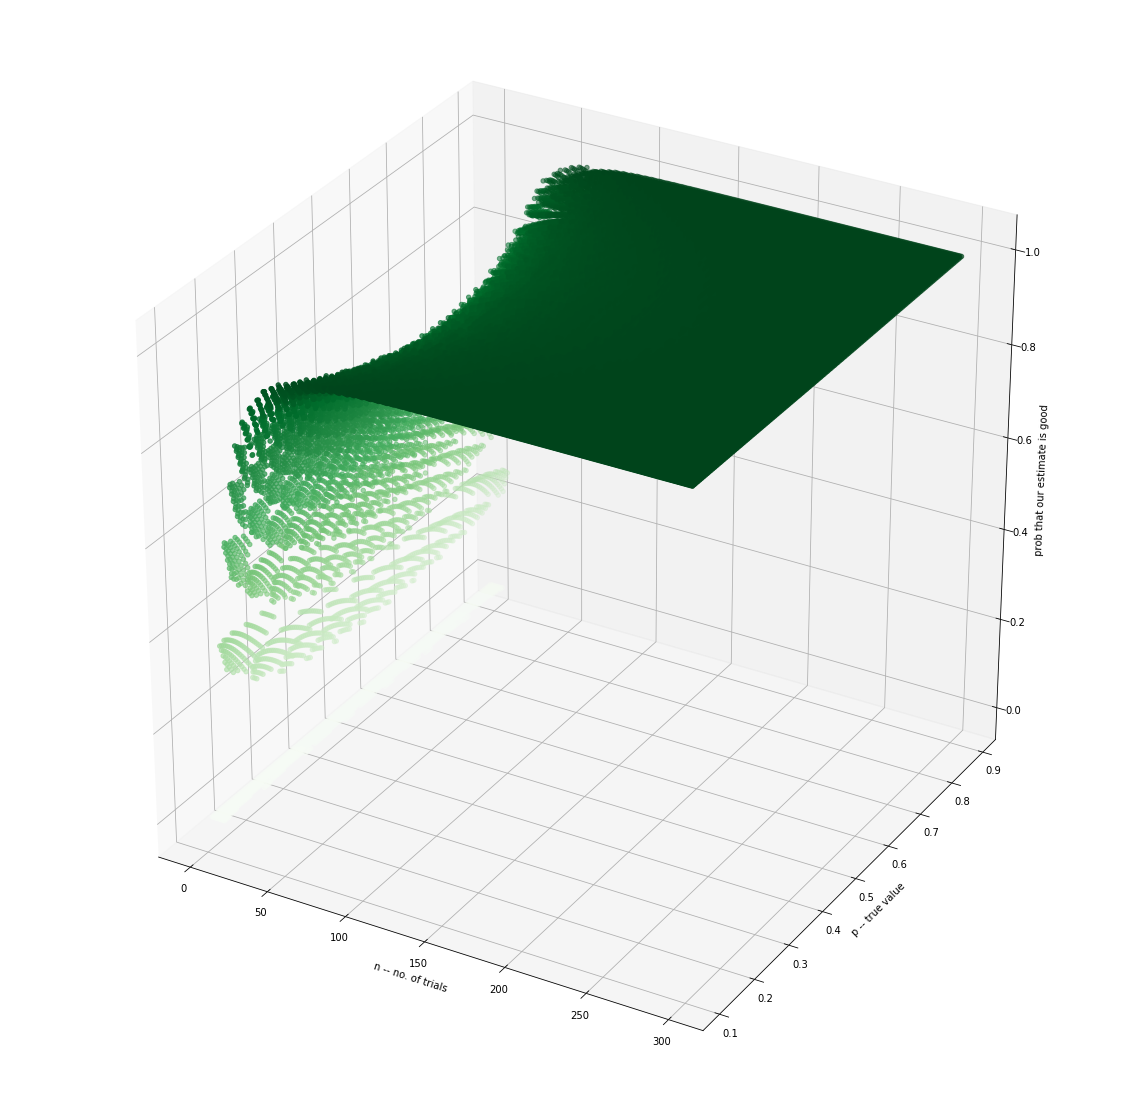

In [98]:
## Let's draw a graph
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')

ax.scatter3D(ns, ps, probs, c=probs, cmap='Greens');
ax.set_xlabel('n -- no. of trials')
ax.set_ylabel('p -- true value')
ax.set_zlabel('prob that our estimate is good');

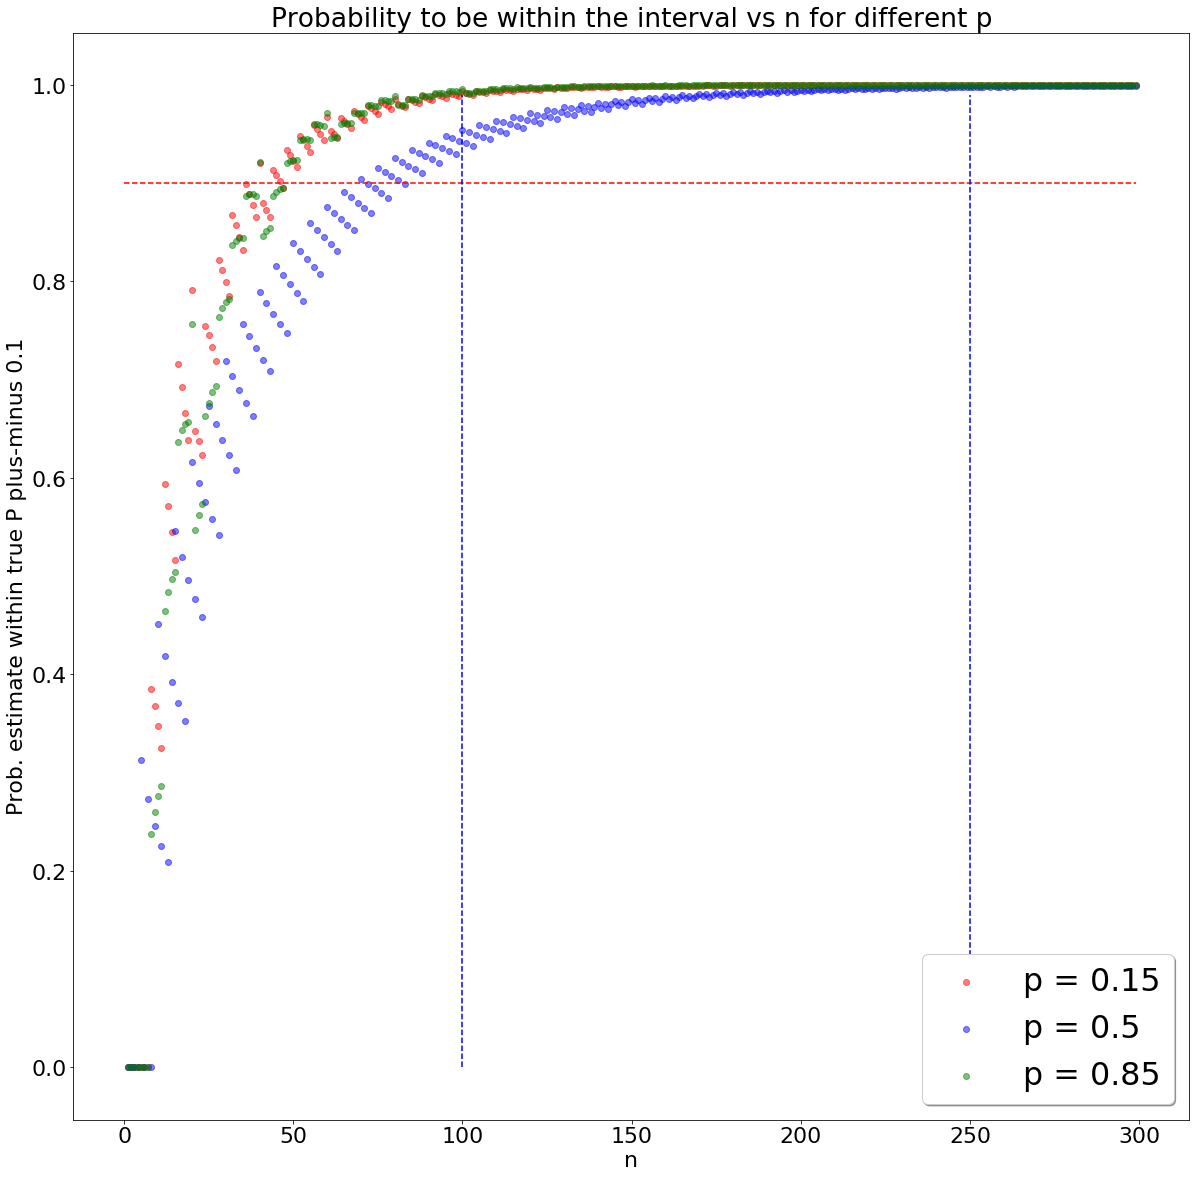

In [126]:
# let us draw a couple of contour plots
fig,ax = plt.subplots(figsize=(20,20))

plt.rcParams.update({'font.size': 22})

plt.title('Probability to be within the interval vs n for different p')
plt.xlabel('n')
plt.ylabel('Prob. estimate within true P plus-minus 0.1')


cols = ["red","blue","green"];
i = 0;

for p in [0.15, 0.5, 0.85]:
    plt.scatter(df.loc[df["trueP"] == p]["n"], df.loc[df["trueP"] == p]["probG"], c=cols[i], alpha=0.5,label="p = "+str(p))
    i=i+1
    
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')

plt.plot(range(0,300),[0.9]*300,'--',color="red")
plt.plot([250]*100, np.arange(0,1,0.01),'--',color="blue")
plt.plot([100]*100, np.arange(0,1,0.01),'--',color="blue")
plt.show()

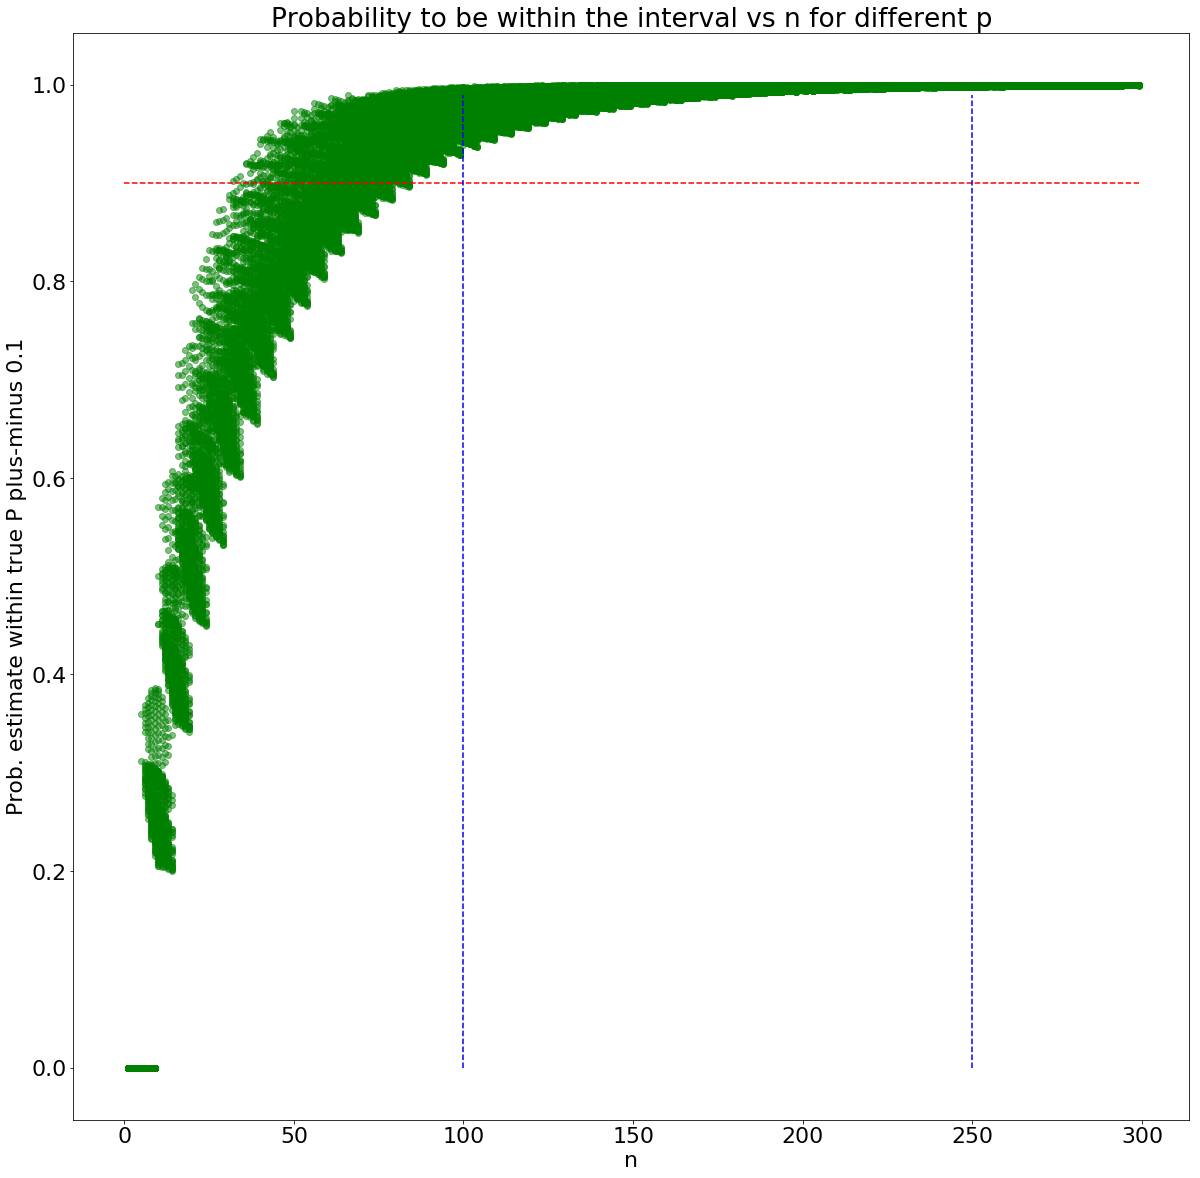

In [125]:
fig,ax = plt.subplots(figsize=(20,20))

plt.title('Probability to be within the interval vs n for different p')
plt.xlabel('n')
plt.ylabel('Prob. estimate within true P plus-minus 0.1')

plt.scatter(df["n"],df["probG"], c="green", alpha=0.5)
    
plt.plot(range(0,300),[0.9]*300,'--',color="red")
plt.plot([250]*100, np.arange(0,1,0.01),'--',color="blue")
plt.plot([100]*100, np.arange(0,1,0.01),'--',color="blue")
plt.show()

## Conclusion
What I was trying to say is that the bound $250$ found with the Chebyshev inequality seems to be above the necessary (around 100) and, consequently is **not** the smallest possible $n$ ...